In [ ]:
# TODO scrape any car data from ss.com
# clean up prices as numerics
# group by make and model
# plot the data - pricing for sure
# if you do more advanced analysis that also could be used for the final project

# for those who want scraping part of final project
# scrape data from somewhere else - maybe Lithuanian ss.com or wikipedia?

In [1]:
import requests
import time 
import pandas as pd
 
from bs4 import BeautifulSoup

In [46]:
url = "https://www.ss.com/en/transport/cars/ford/"
url

'https://www.ss.com/en/transport/cars/ford/'

In [7]:
req = requests.get(url) 
req.status_code

200

In [8]:
soup = BeautifulSoup(req.text, 'lxml') 
soup.title

<title>SS.COM Cars - Ford, Prices - Advertisements</title>

In [ ]:
headline = soup.find("tr", {"id":"head_line"}) # this is a shorter way of finding by tr AND this element having particular id
headline

In [ ]:
headtds = headline.find_all("td")
# td stands for table data
# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/td 
headtds

In [21]:
headcolumns = [el.text for el in headtds[1:]] #.text gets us content even from children and grandchildren
headcolumns

['Model', 'Year', 'Volume', 'Run', 'Price']

In [22]:
def getColList(soup):
    column_list = ["description","url"] 
    headline = soup.find("tr", {"id":"head_line"})
    headtds = headline.find_all("td")
    headcolumns = [el.text for el in headtds[1:]] 
    column_list += headcolumns
    return column_list

In [23]:
column_names = getColList(soup)
column_names

['description', 'url', 'Model', 'Year', 'Volume', 'Run', 'Price']

In [24]:
def getRowList(soup):
    trows = soup.find_all('tr')
    aprows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]
    return aprows

In [25]:
def getRow(row, colist=column_names):
    row_tds = row.find_all('td')
    rowDict = {}
    if len(row_tds) < 3: # a little sanity check
        print("Hmm bad row")
        return rowDict
    
    rowDict[colist[0]] = row_tds[2].text # so the big assumption is that we always get description in 3rd column
    rowDict[colist[1]] = "https://ss.com" + row_tds[1].find('a').get('href')
    for td,key in zip(row_tds[3:],colist[2:]): 
        rowDict[key] = td.text
    return rowDict

In [26]:
def getRows(rowlist,colist=column_names):
    return [getRow(row, colist=colist) for row in rowlist]

In [27]:
def getDFfromURL(url):
    
    req = requests.get(url)
    if req.status_code != 200:
        print("Request Fail with", req.status_code)
        return None 
    soup = BeautifulSoup(req.text, 'lxml')
    column_names = getColList(soup)
    rowlist = getRowList(soup)
    rows = getRows(rowlist,colist=column_names)
    return pd.DataFrame(rows, columns=column_names)

In [109]:
ford_iki = "https://www.ss.com/en/transport/cars/ford/"
my_fords = getDFfromURL(ford_iki)
my_fords.head()

,description,url,Model,Year,Volume,Run,Price
0,Svaiga Ta. Uz skati tika nomainīts dzinējs ar ...,https://ss.com/msg/en/transport/cars/ford/focu...,Focus,2009,1.6D,379 thd.,"2,300 €"
1,Ford Mondeo 2012.g. 2.0 dīzelis\r\n\r\nKomplek...,https://ss.com/msg/en/transport/cars/ford/mond...,Mondeo,2012,2.0D,-,"5,990 €"
2,"Ford Focus , 1.6 Tdci , 80 kw. \r\n-То до 10.2...",https://ss.com/msg/en/transport/cars/ford/focu...,Focus,2009,1.6D,276 thd.,"2,750 €"
3,"Ford C-max 1.6Disel, расход 5-7литров. \r\nНов...",https://ss.com/msg/en/transport/cars/ford/focu...,C-Max,2004,1.6D,300 thd.,"1,180 €"
4,"Pārdodu Ford Focus 2, 0 Dīzelis 100kw ļoti eko...",https://ss.com/msg/en/transport/cars/ford/focu...,Focus,2005,2.0D,209 thd.,"2,150 €"


In [110]:
my_fords.drop("url", inplace=True, axis=1)
my_fords.head()

,description,Model,Year,Volume,Run,Price
0,Svaiga Ta. Uz skati tika nomainīts dzinējs ar ...,Focus,2009,1.6D,379 thd.,"2,300 €"
1,Ford Mondeo 2012.g. 2.0 dīzelis\r\n\r\nKomplek...,Mondeo,2012,2.0D,-,"5,990 €"
2,"Ford Focus , 1.6 Tdci , 80 kw. \r\n-То до 10.2...",Focus,2009,1.6D,276 thd.,"2,750 €"
3,"Ford C-max 1.6Disel, расход 5-7литров. \r\nНов...",C-Max,2004,1.6D,300 thd.,"1,180 €"
4,"Pārdodu Ford Focus 2, 0 Dīzelis 100kw ļoti eko...",Focus,2005,2.0D,209 thd.,"2,150 €"


In [48]:
my_fords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  30 non-null     object
 1   Model        30 non-null     object
 2   Year         30 non-null     object
 3   Volume       30 non-null     object
 4   Run          30 non-null     object
 5   Price        30 non-null     object
dtypes: object(6)
memory usage: 1.5+ KB


In [111]:
my_fords["price_n"] = my_fords.Price.str.split(' ').str[0]
my_fords.head()

,description,Model,Year,Volume,Run,Price,price_n
0,Svaiga Ta. Uz skati tika nomainīts dzinējs ar ...,Focus,2009,1.6D,379 thd.,"2,300 €","2,300"
1,Ford Mondeo 2012.g. 2.0 dīzelis\r\n\r\nKomplek...,Mondeo,2012,2.0D,-,"5,990 €","5,990"
2,"Ford Focus , 1.6 Tdci , 80 kw. \r\n-То до 10.2...",Focus,2009,1.6D,276 thd.,"2,750 €","2,750"
3,"Ford C-max 1.6Disel, расход 5-7литров. \r\nНов...",C-Max,2004,1.6D,300 thd.,"1,180 €","1,180"
4,"Pārdodu Ford Focus 2, 0 Dīzelis 100kw ļoti eko...",Focus,2005,2.0D,209 thd.,"2,150 €","2,150"


In [75]:
my_fords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  30 non-null     object
 1   Model        30 non-null     object
 2   Year         30 non-null     object
 3   Volume       30 non-null     object
 4   Run          30 non-null     object
 5   Price        30 non-null     object
 6   price_n      30 non-null     int32 
dtypes: int32(1), object(6)
memory usage: 1.6+ KB


In [112]:
my_fords.price_n = my_fords.price_n.str.replace(",","").astype('int32') 
my_fords.head()

# df.price = df.price.str.replace(",","").astype('int32') # so clean string of , and then convert to integer
# df.head()

,description,Model,Year,Volume,Run,Price,price_n
0,Svaiga Ta. Uz skati tika nomainīts dzinējs ar ...,Focus,2009,1.6D,379 thd.,"2,300 €",2300
1,Ford Mondeo 2012.g. 2.0 dīzelis\r\n\r\nKomplek...,Mondeo,2012,2.0D,-,"5,990 €",5990
2,"Ford Focus , 1.6 Tdci , 80 kw. \r\n-То до 10.2...",Focus,2009,1.6D,276 thd.,"2,750 €",2750
3,"Ford C-max 1.6Disel, расход 5-7литров. \r\nНов...",C-Max,2004,1.6D,300 thd.,"1,180 €",1180
4,"Pārdodu Ford Focus 2, 0 Dīzelis 100kw ļoti eko...",Focus,2005,2.0D,209 thd.,"2,150 €",2150


In [116]:
my_fords.Run = my_fords.Run.str.replace(" thd.","000")
my_fords.head(15)

C:\Users\zirav\AppData\Local\Temp\ipykernel_15252\1796039834.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  my_fords.Run = my_fords.Run.str.replace(" thd.","000")


,description,Model,Year,Volume,Run,Price,price_n
0,Svaiga Ta. Uz skati tika nomainīts dzinējs ar ...,Focus,2009,1.6D,379000,"2,300 €",2300
1,Ford Mondeo 2012.g. 2.0 dīzelis\r\n\r\nKomplek...,Mondeo,2012,2.0D,-,"5,990 €",5990
2,"Ford Focus , 1.6 Tdci , 80 kw. \r\n-То до 10.2...",Focus,2009,1.6D,276000,"2,750 €",2750
3,"Ford C-max 1.6Disel, расход 5-7литров. \r\nНов...",C-Max,2004,1.6D,300000,"1,180 €",1180
4,"Pārdodu Ford Focus 2, 0 Dīzelis 100kw ļoti eko...",Focus,2005,2.0D,209000,"2,150 €",2150
5,2.0 Tdci. 7 мест. Только пройден ТО. Налог за ...,S-Max,2007,2.0D,-,"2,850 €",2850
6,"Galaxy 2.0, dīzelis Automāts ar 103Kw. \r\n- 7...",Galaxy,2010,2.0D,295000,"6,390 €",6390
7,Auto labā tehniskā stāvoklī. Salons ādas bez b...,C-Max,2004,2.0D,287000,"2,000 €",2000
8,"В продаже Ford Focus в хорошем состоянии, влож...",Focus,1999,1.6,168000,"1,200 €",1200
9,Ford Transit Custom Long. \r\nЦена указанна с ...,Transit,2013,2.2D,198000,"13,200 €",13200


In [122]:
sorted_my_fords_price = my_fords.sort_values(by="price_n",ascending=True)
sorted_my_fords_price.head()

,description,Model,Year,Volume,Run,Price,price_n
23,Продам машину в хорошем техническом состоянии....,Mondeo,2002,2.0,237000,"1,100 €",1100
3,"Ford C-max 1.6Disel, расход 5-7литров. \r\nНов...",C-Max,2004,1.6D,300000,"1,180 €",1180
8,"В продаже Ford Focus в хорошем состоянии, влож...",Focus,1999,1.6,168000,"1,200 €",1200
26,Свежий ТО. \r\nАвто в хорошем техническом и ви...,Mondeo,2003,2.0D,306000,"1,400 €",1400
14,"Ļoti ekonomisks un dinamisks auto, 4.8 eur gāz...",C-Max,2004,1.8,310000,"1,790 €",1790


In [124]:
sorted_my_fords_run = my_fords.sort_values(by="Run",ascending=True) # ???????
sorted_my_fords_run

,description,Model,Year,Volume,Run,Price,price_n
29,5900 eur - 1.0 Benzīns (92 kw) - Super ekonomi...,B-Max,2013,1.0,-,"5,900 €changing",5900
1,Ford Mondeo 2012.g. 2.0 dīzelis\r\n\r\nKomplek...,Mondeo,2012,2.0D,-,"5,990 €",5990
18,"Jauna TA. 1saimnieks, nodokļi apmaksāti pilnīb...",Focus,2009,1.6D,-,"2,599 €",2599
28,"Ford F150 2020. gada, 5.0 litru dīzelis ar aut...",F150,2020,5.0,-,"59,999 €",59999
5,2.0 Tdci. 7 мест. Только пройден ТО. Налог за ...,S-Max,2007,2.0D,-,"2,850 €",2850
11,"Ford kuga 2.0d, Facelift modelis\r\n\r\nUto pe...",Kuga,2016,2.0D,-,"13,499 €",13499
10,Komplektācijā:\r\n\r\n-Jauna TA\r\n-Lietie dis...,Focus,2006,1.6D,-,"2,990 €",2990
27,"Ford Focus Business Line 1.5 Tdci 88kw/120zs, ...",Focus,2016,1.5D,128000,"9,990 €",9990
8,"В продаже Ford Focus в хорошем состоянии, влож...",Focus,1999,1.6,168000,"1,200 €",1200
12,Ford Transit Custom 2.2Tdci 9 sēdvietas. \r\nT...,Transit,2013,2.2D,176000,"14,990 €",14990


In [130]:
sorted_my_fords_year = my_fords.sort_values(by="Year",ascending=True)
sorted_my_fords_year

,description,Model,Year,Volume,Run,Price,price_n
8,"В продаже Ford Focus в хорошем состоянии, влож...",Focus,1999,1.6,168000,"1,200 €",1200
23,Продам машину в хорошем техническом состоянии....,Mondeo,2002,2.0,237000,"1,100 €",1100
26,Свежий ТО. \r\nАвто в хорошем техническом и ви...,Mondeo,2003,2.0D,306000,"1,400 €",1400
14,"Ļoti ekonomisks un dinamisks auto, 4.8 eur gāz...",C-Max,2004,1.8,310000,"1,790 €",1790
3,"Ford C-max 1.6Disel, расход 5-7литров. \r\nНов...",C-Max,2004,1.6D,300000,"1,180 €",1180
7,Auto labā tehniskā stāvoklī. Salons ādas bez b...,C-Max,2004,2.0D,287000,"2,000 €",2000
4,"Pārdodu Ford Focus 2, 0 Dīzelis 100kw ļoti eko...",Focus,2005,2.0D,209000,"2,150 €",2150
10,Komplektācijā:\r\n\r\n-Jauna TA\r\n-Lietie dis...,Focus,2006,1.6D,-,"2,990 €",2990
15,"Tiek tirgots labs, ģimenes auto Ford Galaxy. \...",Galaxy,2006,2.0D,281000,"3,200 €",3200
5,2.0 Tdci. 7 мест. Только пройден ТО. Налог за ...,S-Max,2007,2.0D,-,"2,850 €",2850


<AxesSubplot: xlabel='Run'>

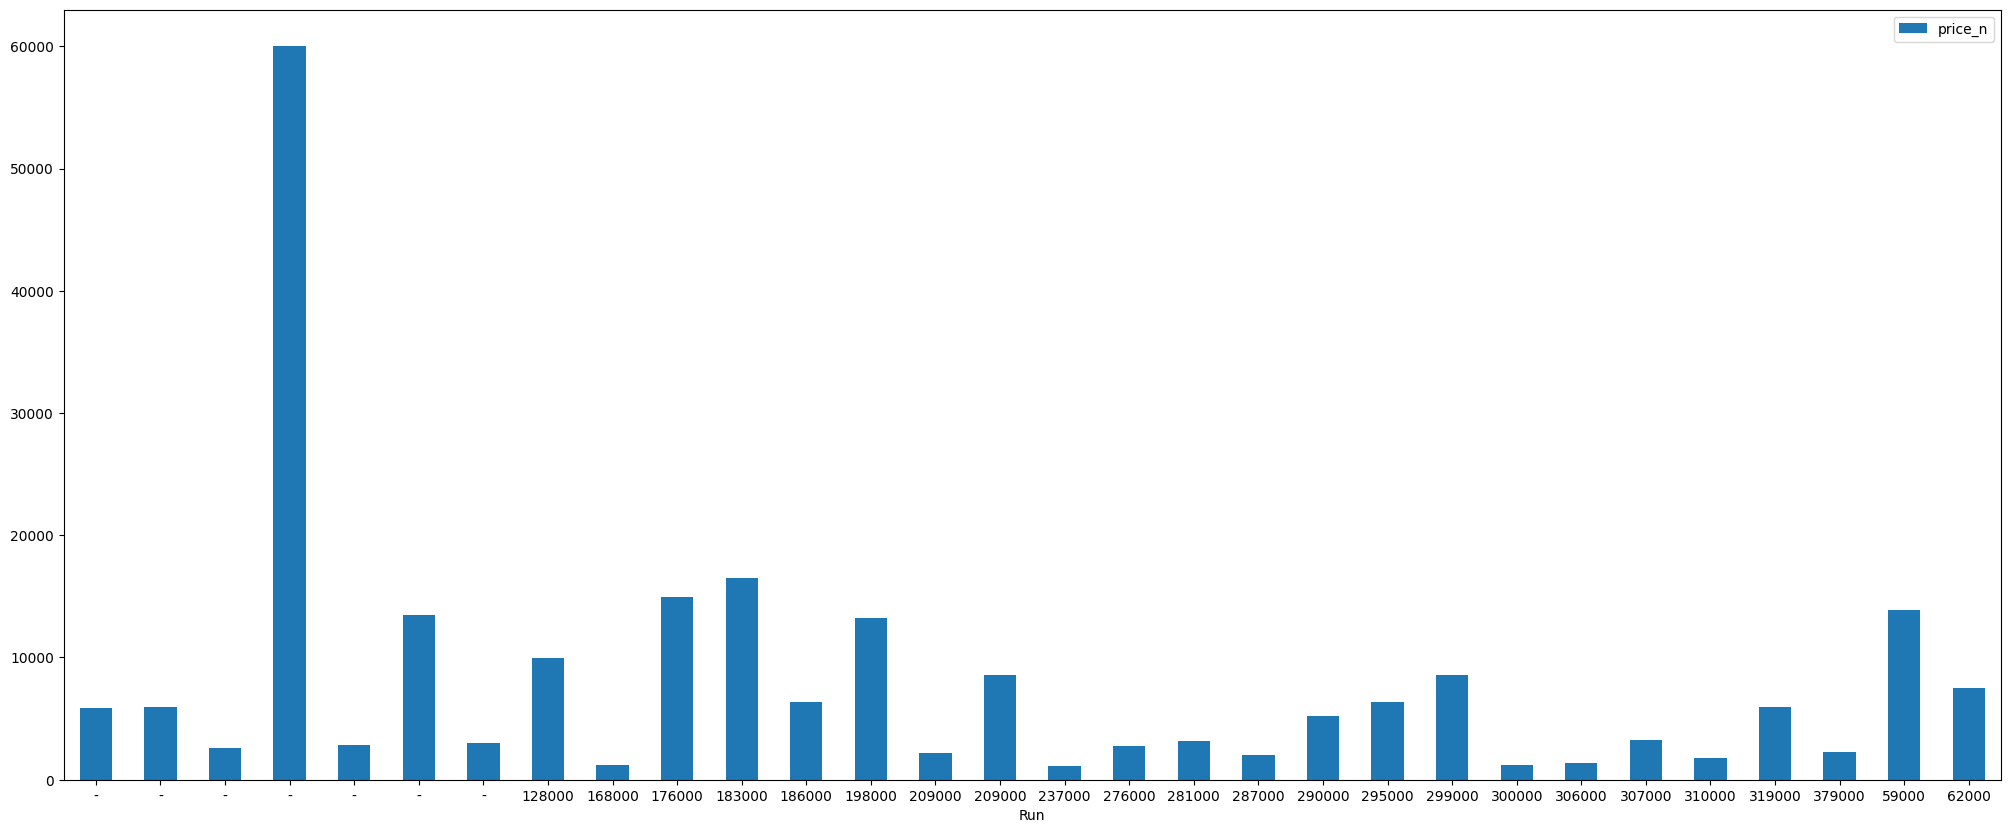

In [152]:
sorted_my_fords_run.plot.bar(x='Run', y="price_n", rot=0, figsize=(25, 10))

In [125]:
grouped_by_model = my_fords.groupby(by="Model")['price_n'].agg(["count", "min", "max", "mean", ])
grouped_by_model

,count,min,max,mean
Model,,,,
Another,1,7500,7500,7500.000000
B-Max,1,5900,5900,5900.000000
C-Max,5,1180,13900,5052.000000
F150,1,59999,59999,59999.000000
Focus,9,1200,9990,3691.000000
Galaxy,2,3200,6390,4795.000000
Kuga,1,13499,13499,13499.000000
Mondeo,5,1100,8600,4468.000000
S-Max,2,2850,8590,5720.000000


array([[<AxesSubplot: title={'center': 'count'}>,
        <AxesSubplot: title={'center': 'min'}>],
       [<AxesSubplot: title={'center': 'max'}>,
        <AxesSubplot: title={'center': 'mean'}>]], dtype=object)

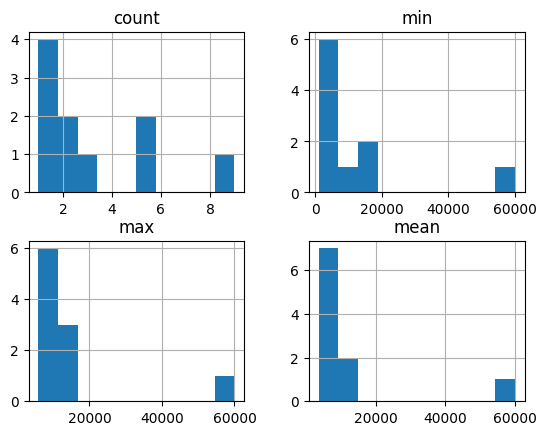

In [131]:
grouped_by_model.hist()

In [141]:
grouped_by_model['Model_c'] = grouped_by_model.index
grouped_by_model

,count,min,max,mean,Model_c
Model,,,,,
Another,1,7500,7500,7500.000000,Another
B-Max,1,5900,5900,5900.000000,B-Max
C-Max,5,1180,13900,5052.000000,C-Max
F150,1,59999,59999,59999.000000,F150
Focus,9,1200,9990,3691.000000,Focus
Galaxy,2,3200,6390,4795.000000,Galaxy
Kuga,1,13499,13499,13499.000000,Kuga
Mondeo,5,1100,8600,4468.000000,Mondeo
S-Max,2,2850,8590,5720.000000,S-Max


<AxesSubplot: xlabel='Model_c'>

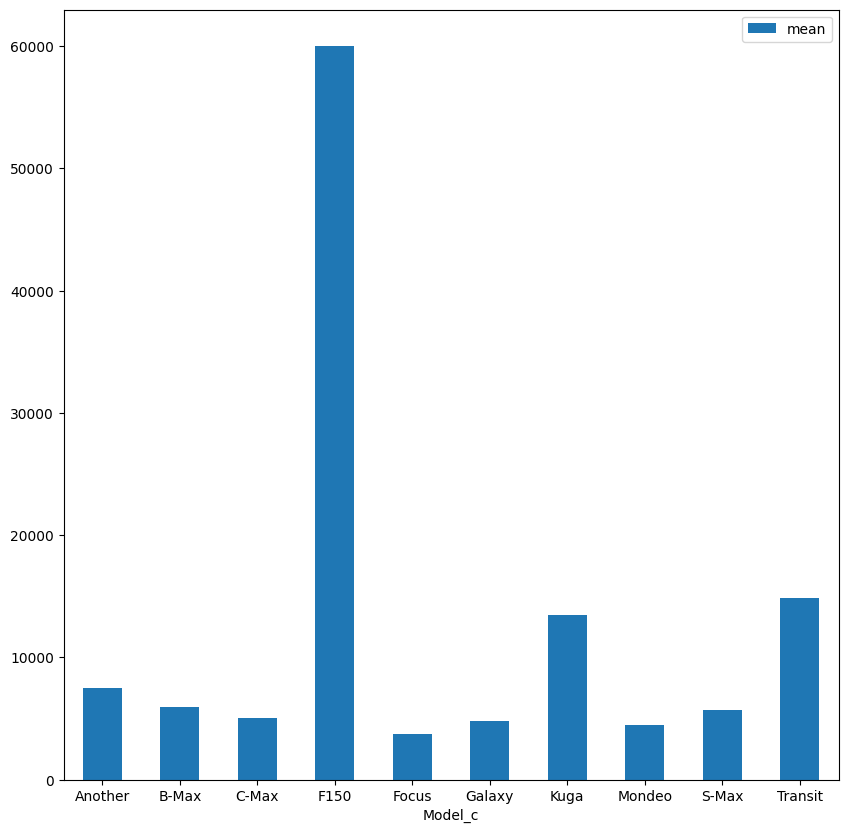

In [156]:
grouped_by_model.plot.bar(x='Model_c', y="mean", rot=0, figsize=(10, 10))

In [127]:
grouped_by_vol = my_fords.groupby(by="Volume")['price_n'].agg(["count", "min", "max", "mean", ]) # what is an opportunity to delete D and H in 'Volume'
grouped_by_vol

,count,min,max,mean
Volume,,,,
1.0,1,5900,5900,5900.000000
1.4,1,7500,7500,7500.000000
1.5D,2,8600,9990,9295.000000
1.6,1,1200,1200,1200.000000
1.6D,6,1180,5990,2968.166667
1.8,1,1790,1790,1790.000000
2.0,1,1100,1100,1100.000000
2.0D,12,1400,13499,5079.916667
2.0H,1,13900,13900,13900.000000


array([[<AxesSubplot: title={'center': 'count'}>,
        <AxesSubplot: title={'center': 'min'}>],
       [<AxesSubplot: title={'center': 'max'}>,
        <AxesSubplot: title={'center': 'mean'}>]], dtype=object)

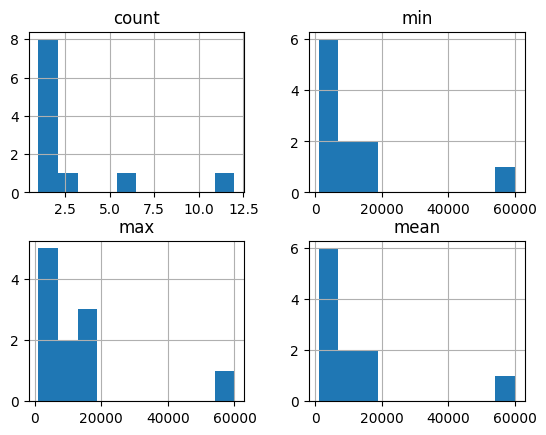

In [133]:
grouped_by_vol.hist()

In [145]:
import numpy as np

In [146]:
my_fords_pivoted =pd.pivot_table(data=my_fords, index=["Model"], columns=["Volume"], values=["price_n"], aggfunc=np.mean)
my_fords_pivoted

price_n                                                                \
Volume      1.0     1.4    1.5D     1.6    1.6D     1.8     2.0          2.0D   
Model                                                                           
Another     NaN  7500.0     NaN     NaN     NaN     NaN     NaN           NaN   
B-Max    5900.0     NaN     NaN     NaN     NaN     NaN     NaN           NaN   
C-Max       NaN     NaN     NaN     NaN  1180.0  1790.0     NaN   4195.000000   
F150        NaN     NaN     NaN     NaN     NaN     NaN     NaN           NaN   
Focus       NaN     NaN  9990.0  1200.0  3325.8     NaN     NaN   2700.000000   
Galaxy      NaN     NaN     NaN     NaN     NaN     NaN     NaN   4795.000000   
Kuga        NaN     NaN     NaN     NaN     NaN     NaN     NaN  13499.000000   
Mondeo      NaN     NaN  8600.0     NaN     NaN     NaN  1100.0   4213.333333   
S-Max       NaN     NaN     NaN     NaN     NaN     NaN     NaN   5720.000000   
Transit     NaN     NaN     NaN     NaN     NaN     NaN     NaN           NaN   

                                         
Volume      2.0H          2.2D      5.0  
Model                                    
Another      NaN           NaN      NaN  
B-Max        NaN           NaN      NaN  
C-Max    13900.0           NaN      NaN  
F150         NaN           NaN  59999.0  
Focus        NaN           NaN      NaN  
Galaxy       NaN           NaN      NaN  
Kuga         NaN           NaN      NaN  
Mondeo       NaN           NaN      NaN  
S-Max        NaN           NaN      NaN  
Transit      NaN  14896.666667      NaN

In [157]:
# import seaborn as sns

In [ ]:
# ax = sns.heatmap(data=my_fords_pivoted, cmap='Greens', annot=True, fmt='.1f')
# ax.set_title('Price by volume and model')

In [ ]:
my_fords_pivoted.plot.bar(x='Model_c', y="mean", rot=0, figsize=(10, 10))

In [128]:
my_fords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  30 non-null     object
 1   Model        30 non-null     object
 2   Year         30 non-null     object
 3   Volume       30 non-null     object
 4   Run          30 non-null     object
 5   Price        30 non-null     object
 6   price_n      30 non-null     int32 
dtypes: int32(1), object(6)
memory usage: 1.6+ KB


In [129]:
my_fords.to_csv("my_fords.csv", encoding="UTF-8")